In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import ProjectiveTransform

from image import get_patch
from vis import plot_images, plot_with_keypoints
from tools import invert_coords
from tools import trim_coords_to_shape, get_keypoints

from ExposureDescriptor import ExposureDescriptor

%matplotlib inline

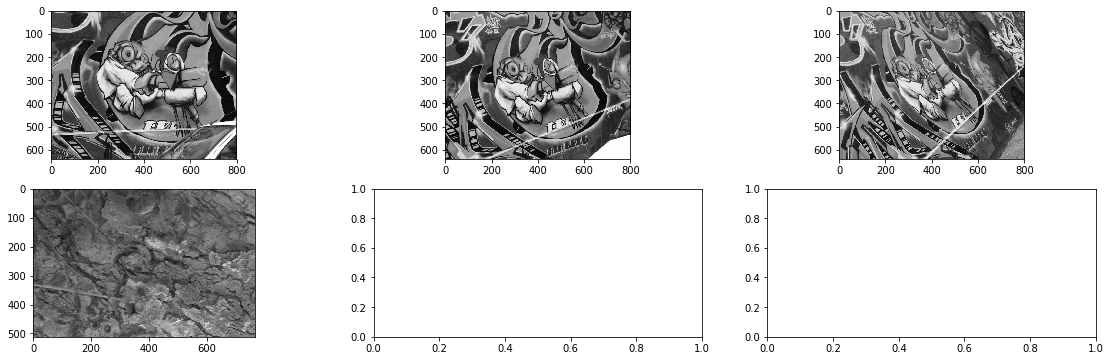

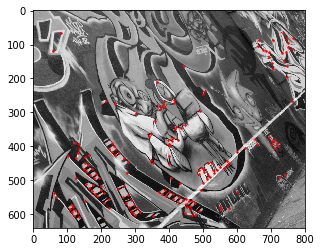

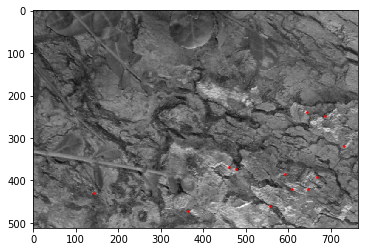

In [3]:
H1to2 = np.loadtxt('images/viewpoint-1/H1to2p')
H1to3 = np.loadtxt('images/viewpoint-1/H1to3p')
H1to4 = np.loadtxt('images/viewpoint-1/H1to4p')
H1to5 = np.loadtxt('images/viewpoint-1/H1to5p')
H1to6 = np.loadtxt('images/viewpoint-1/H1to6p')

img1 = imread('images/viewpoint-1/img1.ppm', as_grey=True)
img2 = imread('images/viewpoint-1/img2.ppm', as_grey=True)
img3 = imread('images/viewpoint-1/img4.ppm', as_grey=True)
coords3 = get_keypoints(img3)
img4 = imread('images/zoom-rotation-1/img1.ppm', as_grey=True)
coords4 = get_keypoints(img4)

plot_images([img1, img2, img3, img4])
plot_with_keypoints(img3, coords3)
plot_with_keypoints(img4, coords4)

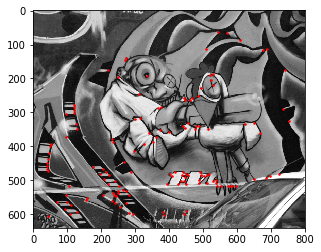

In [4]:
coords = get_keypoints(img1)
plot_with_keypoints(img1, coords)

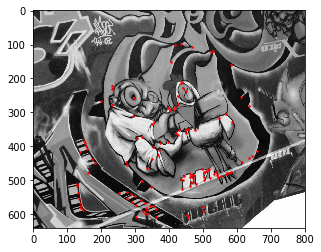

In [5]:
trans = ProjectiveTransform(H1to2)
coords2 = trim_coords_to_shape(img2.shape, trans(coords))
plot_with_keypoints(img2, coords2)

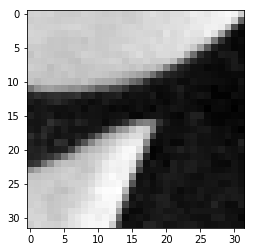

In [9]:
patch = get_patch(img1, coords[12], size=(32, 32))
patch2 = get_patch(img2, [coords2[0, 1], coords2[0, 0]], size=(32, 32))
plt.imshow(patch, cmap='gray')


plt.imshow(patch2, cmap='gray')

In [7]:
exp_desc = ExposureDescriptor()
desc1 = exp_desc.extract(img1, coords)
desc2 = exp_desc.extract(img2, coords2)
desc3 = exp_desc.extract(img3, coords3)
desc4 = exp_desc.extract(img4, coords4)

print(exp_desc.distance(desc1, desc2))
print(exp_desc.distance(desc1, desc3))
print(exp_desc.distance(desc1, desc4))
print(exp_desc.distance(desc2, desc3))

0.13086218525179857
0.11198204419889501
0.26687275179856107
0.11493007596685084
